This notebook refers to the following blog post: [Matplotlib: Pyplot by Example](http://queirozf.com/entries/matplotlib-pyplot-by-example)

In [1]:
import matplotlib

import matplotlib.pyplot as plt
import numpy as np

print(matplotlib.__version__,',', np.__version__)

2.1.0 , 1.14.5


In [2]:
# with this, you don't need to call plt.show()
%matplotlib inline

In [3]:
# for reproducibility
np.random.seed(42)

## sample data generation

In [4]:
x = np.linspace(0.0,100,50)
y = np.random.uniform(low=0,high=10,size=50)

## default arguments

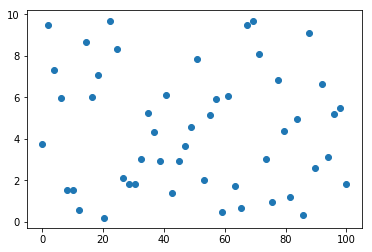

In [5]:
plt.scatter(x,y)

## Change size of figure

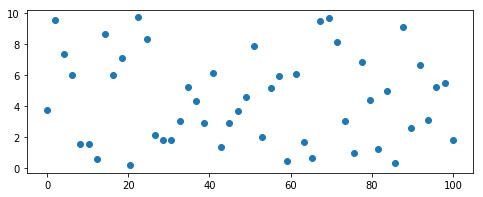

In [6]:
# clear current figure
plt.clf()

plt.scatter(x,y)
fig = plt.gcf()
fig.set_size_inches(8,3)

## Save plot to file

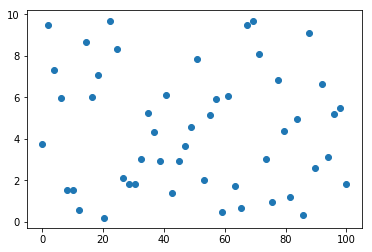

In [7]:
# clear current figure
plt.clf()

plt.scatter(x,y)

plt.savefig('out.png')

## Multiple subplots in the same figure

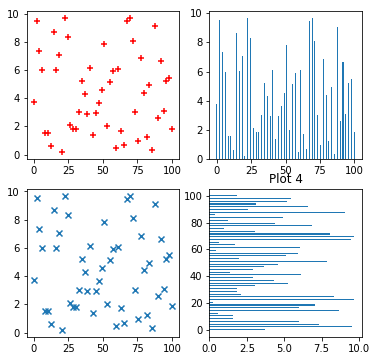

In [8]:
# clear current figure
plt.clf()

fig, axes = plt.subplots(2,2)

axes[0][0].scatter(x,y,c='red',marker='+')

axes[0][1].bar(x,y)

axes[1][0].scatter(x,y,marker='x')

axes[1][1].barh(x,y)
axes[1][1].set_title('Plot 4')

fig.set_size_inches(6,6)

## Set figure title and font size

Text(0.5,0.98,'IMAGE TITLE HERE')

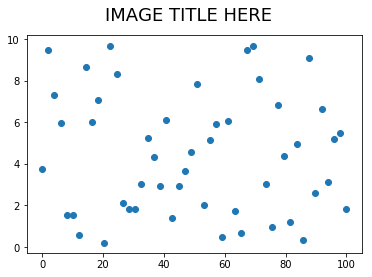

In [9]:
# clear current figure
plt.clf()

plt.scatter(x,y)

fig = plt.gcf()

fig.suptitle('IMAGE TITLE HERE', fontsize=18)

## Change legend text and location

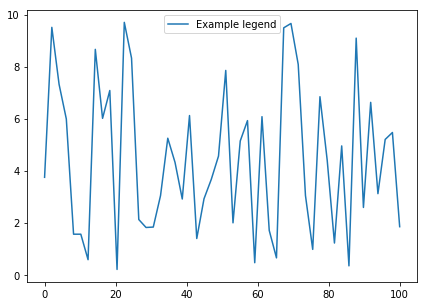

In [10]:
# clear current figure
plt.clf()

plt.plot(x,y)
plt.legend(['Example legend'],loc='upper center')

plt.gcf().set_size_inches(7,5)

## Change tick label rotation

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 8 Text yticklabel objects>)

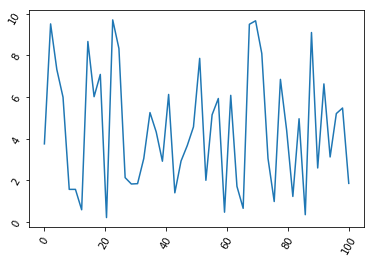

In [11]:
# clear current figure
plt.clf()

plt.plot(x,y)

# rotating labels on the xaxis
plt.xticks(rotation=60)

# y axis
plt.yticks(rotation=60)

## Set axis labels and fontsize

Text(0,0.5,'temperature (C)')

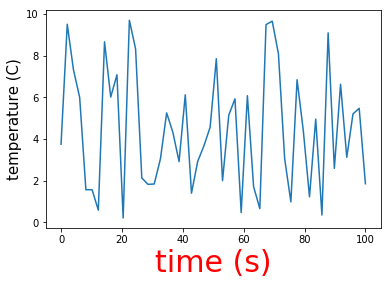

In [12]:
plt.clf()
plt.plot(x,y)

plt.xlabel('time (s)',color='red',fontsize=30)
plt.ylabel('temperature (C)', fontsize=15)

## Set y-axis, x-axis limits

(-30, 130)

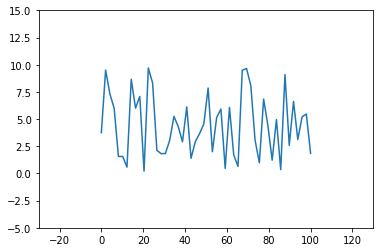

In [13]:
# clear current figure
plt.clf()

plt.plot(x,y)

plt.ylim(-5,15)

plt.xlim(-30,130)

## Set tick frequency

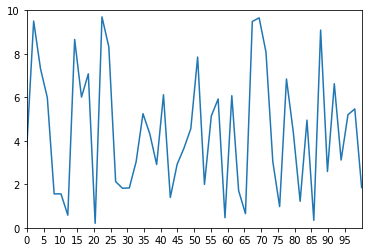

In [14]:
# clear current figure
plt.clf()

plt.plot(x,y)

# make the limits a bit larger so that we can see the results
plt.ylim(0,10)
plt.xlim(0,100)

# tell pyplot to write a x-axis tick every 5 units
plt.xticks(np.arange(0, 100, 5))
plt.show()

## gridlines

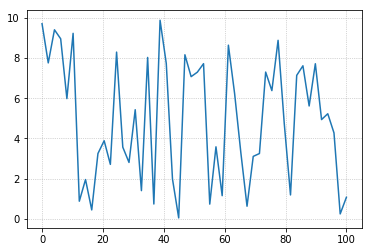

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# generate sample data
x = np.linspace(0.0,100,50)
y = np.random.uniform(low=0,high=10,size=50)

plt.gca().grid(True)

# select both y axis and x axis
gridlines = plt.gca().get_xgridlines() + plt.gca().get_ygridlines()

# choose line width
line_width = 0.7

for line in gridlines:
    line.set_linestyle(':')
    line.set_linewidth(line_width)
    
plt.plot(x,y)

In [16]:
def plot_value_labels(axis):

    rects = axis.patches

    # For each bar: Place a label
    for rect in rects:

        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        label = '{:.2f}'.format(y_value)
        
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Create annotation

        axis.annotate(label, (x_value, y_value), 
                      xytext=(0, 2), 
                      textcoords="offset points", 
                      ha='center', 
                      rotation=45, 
                      va=va)           

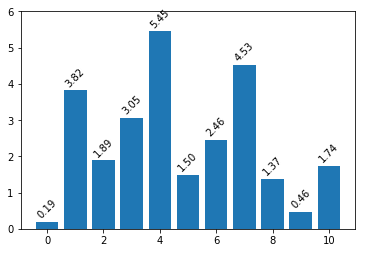

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# generate sample data
x = np.linspace(0.0,10,11)
y = np.random.uniform(low=0,high=6,size=11)

# plot bar plot
plt.bar(x,y)
plt.ylim(0,6)

# call the function we defined
plot_value_labels(plt.gca())

plt.show()

### plot a histogram for values in an numpy array

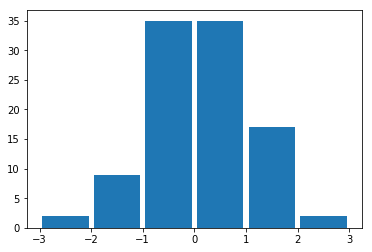

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# generate sample data following a normal distribution
values = np.random.normal(size=100)
# array([ 0.49671415, -0.1382643 ,  0.64768854,...

# see all examples in the API link
plt.hist(values,rwidth=0.9,bins=[-3,-2,-1,0,1,2,3])

plt.show()

### string axis labels

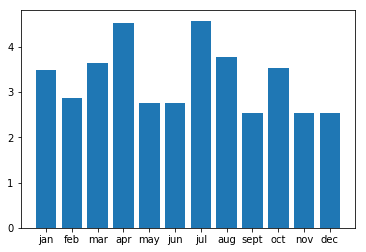

In [19]:
np.random.seed(42)

xs = [1,2,3,4,5,6,7,8,9,10,11,12]
ys = np.random.normal(loc=3.0,size=12)
labels = ['jan','feb','mar','apr','may','jun','jul','aug','sept','oct','nov','dec']

plt.clf()
plt.bar(xs,ys)

# tell pyplot which labels correspond to which x values
plt.xticks(xs,labels)

plt.show()


### horizontal bar plot

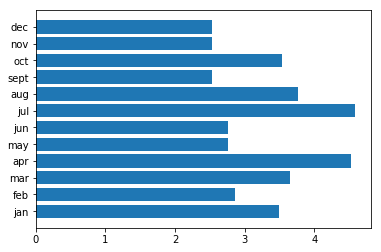

In [21]:
np.random.seed(42)

xs = [1,2,3,4,5,6,7,8,9,10,11,12]
ys = np.random.normal(loc=3.0,size=12)
labels = ['jan','feb','mar','apr','may','jun','jul','aug','sept','oct','nov','dec']

plt.clf()
plt.barh(xs,ys)

# tell pyplot which labels correspond to which x values
plt.yticks(xs,labels)

plt.show()

## twin axes

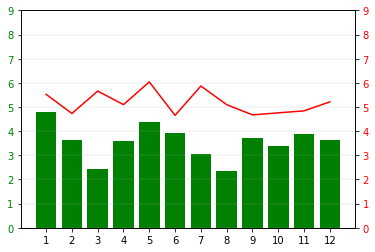

In [63]:
plt.clf()

xs = [1,2,3,4,5,6,7,8,9,10,11,12]
ys_bars = np.random.normal(loc=3.0,size=12)
ys_lines = np.random.normal(loc=5.0,size=12,scale=0.5)

ax1=plt.gca()
ax1.bar(xs,ys_bars,color='green')

# order is important when setting ticks.
# Ticks must be set after the plot has been drawn
ax1.set_yticks(np.arange(0,10,1))
ax1.set_yticklabels(np.arange(0,10,1),color='green')

# create the 'twin' axis on the right
ax2=ax1.twinx()
ax2.plot(xs,ys_lines,color='red')

ax2.set_yticks(np.arange(0,10,1))
ax2.set_yticklabels(np.arange(0,10,1),color='red')

# set ticks for the x axis (bottom)
ax2.xaxis.set_ticks(xs)
ax2.grid(True,linewidth=0.2)

plt.show()